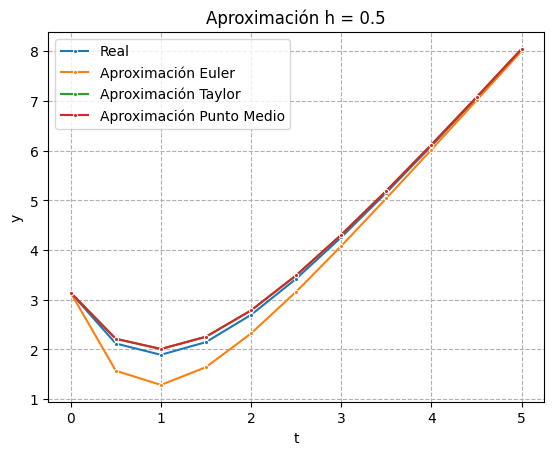

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


caso = 3


def condiciones(caso):
  match caso:
    case 1:
      y0 = 1
      t0 = 0
    case 2:
      y0 = 500
      t0 = 0
    case 3:
      y0 = np.pi
      t0 = 0
  return y0, t0

y0, t0 = condiciones(caso)

def yprima(t, y, caso):
  match caso:
    case 1:
      yprima = -t*y
    case 2:
      r = 0.3
      yprima = r*y
    case 3:
      yprima = 2*t-y
  return yprima

def yyprima(t, y, caso):
  match caso:
    case 1:
      dfdt = -y
      dfdy = -t*(-t*y)
      yyprima = dfdt+dfdy
    case 2:
      r = 0.3
      dfdt = 0
      dfdy = r*(r*y)
      yyprima = dfdt+dfdy
    case 3:
      dfdt = 2
      dfdy = -1*(2*t-y)
      yyprima = dfdt+dfdy
  return yyprima

def y(t, caso):
  match caso:
    case 1:
      y = np.exp(-(t**2)/2)
    case 2:
      r = 0.3
      y = 500*np.exp(r*t)
    case 3:
      y = 2*(t-1)+(2+np.pi)/np.exp(t)
  return y



def valor_real(t0, y0, h, n, caso):
  t = []
  t.append(t0)
  valor  = []
  valor.append(y0)
  for i in range(1, n+1):
    ti = t0 + i*h
    t.append(ti)
    valor.append(y(t[i], caso))
  return valor, t

def euler(t0 , y0, h, n, caso):
  aprox = []
  aprox.append(y0)
  t = []
  t.append(t0)
  for i in range(1, n+1):
    ti = t0 + i*h
    t.append(ti)
    yi = aprox[i-1] + h*yprima(t[i-1], aprox[i-1], caso)
    aprox.append(yi)
  return aprox

def taylor(t0 , y0, h, n, caso):
  aprox = []
  aprox.append(y0)
  t = []
  t.append(t0)
  for i in range(1, n+1):
    ti = t0 + i*h
    t.append(ti)
    yi = aprox[i-1] + h*yprima(t[i-1], aprox[i-1], caso) + (h**2)/2*yyprima(t[i-1], aprox[i-1], caso)
    aprox.append(yi)
  return aprox

def punto_medio_explicito(t0 , y0, h, n, caso):
  aprox = []
  aprox.append(y0)
  t = []
  t.append(t0)
  for i in range(1, n+1):
    ti = t0 + i*h
    t.append(ti)
    k1 = yprima(t[i-1], aprox[i-1], caso)
    k2 = yprima((t[i-1]+t[i])/2, aprox[i-1]+1/2*h*k1, caso)
    yi = aprox[i-1] + h*k2
    aprox.append(yi)
  return aprox

def error(real, aprox):
  error=[]
  for i in range(0, len(real)):
    error_relativo = np.abs((real[i]- aprox[i]))
    error.append(error_relativo)
  return error

t_final = 5
n  = 10 #Número de iteraciones
h = (t_final-0)/n  #Intervalos de tiempo

real, tiempo = valor_real(t0, y0, h, n, caso)
aprox_euler = euler(t0, y0, h, n, caso)
aprox_taylor = taylor(t0, y0, h, n, caso)
aprox_puntom = punto_medio_explicito(t0, y0, h, n, caso)


sns.lineplot(x=tiempo, y=real, marker=".", label='Real')
sns.lineplot(x=tiempo, y=aprox_euler, marker=".", label='Aproximación Euler')
sns.lineplot(x=tiempo, y=aprox_taylor, marker=".", label='Aproximación Taylor')
sns.lineplot(x=tiempo, y=aprox_puntom, marker=".", label='Aproximación Punto Medio')
plt.title('Aproximación h = 0.5')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()


[0.0, 0.5477372573605499, 0.6060880687363581, 0.5045453105147568, 0.3744893572114991, 0.2613728554698853, 0.17564743975164188, 0.11509395215565643, 0.07408720805303481, 0.04707576183823914, 0.029622692215003354]
[0.0, 0.09496182433817424, 0.11694839817470637, 0.10802725172933947, 0.08870587940340124, 0.06829286002059742, 0.05047797873299498, 0.0362766075487837, 0.025540478338012207, 0.01770208544405083, 0.012118733980370777]
[0.0, 0.09496182433817424, 0.11694839817470681, 0.10802725172933991, 0.08870587940340169, 0.06829286002059787, 0.05047797873299498, 0.0362766075487837, 0.025540478338012207, 0.01770208544405083, 0.012118733980370777]


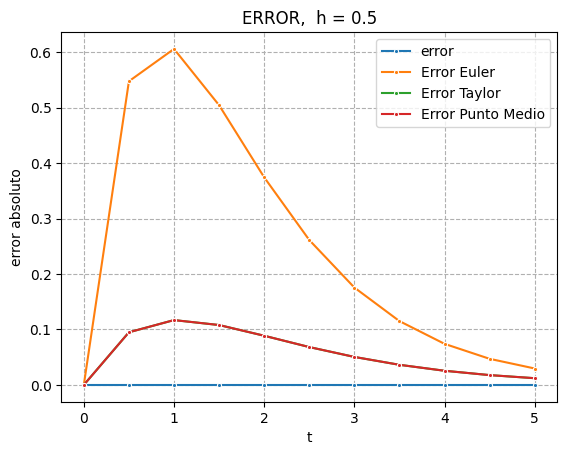

In [10]:
#errores
error_real = error(real, real)
error_e = error(real, aprox_euler)
print(error_e)
error_t = error(real, aprox_taylor)
print(error_t)
error_pm = error(real, aprox_puntom)
print(error_pm)

sns.lineplot(x=tiempo, y=error_real, marker=".", label='error')
sns.lineplot(x=tiempo, y=error_e, marker=".", label='Error Euler')
sns.lineplot(x=tiempo, y=error_t, marker=".", label='Error Taylor')
sns.lineplot(x=tiempo, y=error_pm, marker=".", label='Error Punto Medio')
plt.title('ERROR,  h = 0.5')
plt.xlabel('t')
plt.ylabel('error absoluto')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

In [11]:
df1 = pd.DataFrame({'tiempo': tiempo, 'real': real, 'Euler': aprox_euler, 'Taylor': aprox_taylor, 'PuntoMedioExp': aprox_puntom})
df1.head(-1)

,tiempo,real,Euler,Taylor,PuntoMedioExp
0,0.0,3.141593,3.141593,3.141593,3.141593
1,0.5,2.118534,1.570796,2.213495,2.213495
2,1.0,1.891486,1.285398,2.008435,2.008435
3,1.5,2.147244,1.642699,2.255272,2.255272
4,2.0,2.695839,2.321350,2.784545,2.784545
5,2.5,3.422048,3.160675,3.490340,3.490340
6,3.0,4.255985,4.080337,4.306463,4.306463
7,3.5,5.155263,5.040169,5.191539,5.191539
8,4.0,6.094172,6.020084,6.119712,6.119712
9,4.5,7.057118,7.010042,7.074820,7.074820


In [12]:

n  = 50 #Número de iteraciones
h = (t_final-0)/n #Intervalos de tiempo

real1, tiempo1 = valor_real(t0, y0, h, n, caso)
aprox_euler1 = euler(t0, y0, h, n, caso)
aprox_taylor1 = taylor(t0, y0, h, n, caso)
aprox_puntom1 = punto_medio_explicito(t0, y0, h, n, caso)

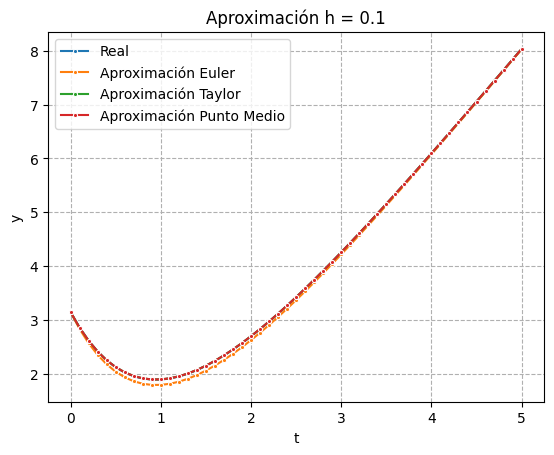

In [13]:
sns.lineplot(x=tiempo1, y=real1, marker=".", label='Real')
sns.lineplot(x=tiempo1, y=aprox_euler1, marker=".", label='Aproximación Euler')
sns.lineplot(x=tiempo1, y=aprox_taylor1, marker=".", label='Aproximación Taylor')
sns.lineplot(x=tiempo1, y=aprox_puntom1, marker=".", label='Aproximación Punto Medio')
plt.title('Aproximación h = 0.1')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

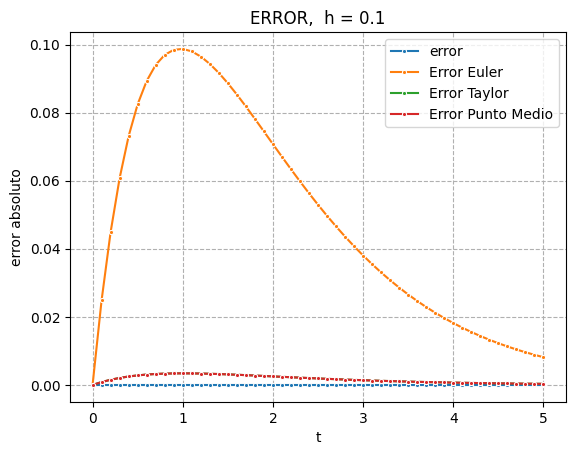

In [14]:
#errores
error_real1 = error(real1, real1)
error_e1= error(real1, aprox_euler1)
errot_t1 = error(real1, aprox_taylor1)
errot_pm1 = error(real1, aprox_puntom1)

sns.lineplot(x=tiempo1, y=error_real1, marker=".", label='error')
sns.lineplot(x=tiempo1, y=error_e1, marker=".", label='Error Euler')
sns.lineplot(x=tiempo1, y=errot_t1 , marker=".", label='Error Taylor')
sns.lineplot(x=tiempo1, y=errot_pm1, marker=".", label='Error Punto Medio')
plt.title('ERROR,  h = 0.1')
plt.xlabel('t')
plt.ylabel('error absoluto')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

In [15]:
df1 = pd.DataFrame({'tiempo': tiempo1, 'real': real1, 'Euler': aprox_euler1, 'Taylor': aprox_taylor1, 'PuntoMedioExp': aprox_puntom1})
df1.head(-1)

,tiempo,real,Euler,Taylor,PuntoMedioExp
0,0.0,3.141593,3.141593,3.141593,3.141593
1,0.1,2.852305,2.827433,2.853141,2.853141
2,0.2,2.609580,2.564690,2.611093,2.611093
3,0.3,2.408986,2.348221,2.411039,2.411039
4,0.4,2.246513,2.173399,2.248990,2.248990
5,0.5,2.118534,2.036059,2.121336,2.121336
6,0.6,2.021766,1.932453,2.024809,2.024809
7,0.7,1.953239,1.859208,1.956452,1.956452
8,0.8,1.910267,1.813287,1.913589,1.913589
9,0.9,1.890416,1.791958,1.893798,1.893798
